# Waveform Generator

The PSLab's waveform generator can output several types of functions on two channels, at frequencies between 20 Hz - 5 kHz.

In [56]:
import pslab
psl = pslab.ScienceLab()

By default, the waveform generator outputs sine waves. To begin with, let's generate a 50 Hz size wave. Connect SI1 to CH1 to use the oscilloscope to observe the output.

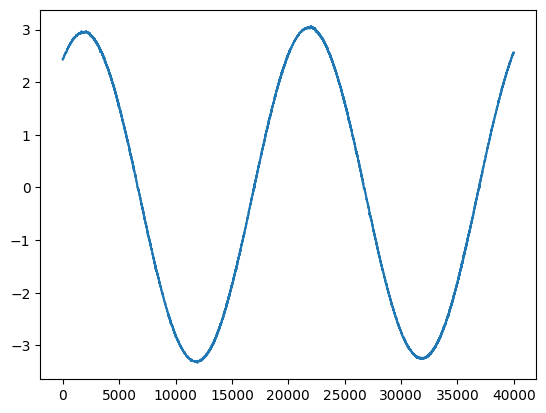

In [62]:
import matplotlib.pyplot as plt
psl.waveform_generator.generate(channels="SI1", frequency=50)
x, y = psl.oscilloscope.capture(channels="CH1", samples=10000, timegap=4)
plt.plot(x, y)

The waveform generator has two channels. Let's add the second one. The `phase` argument is used to offset the two functions from each other, in degrees. Connect SI2 to CH2.

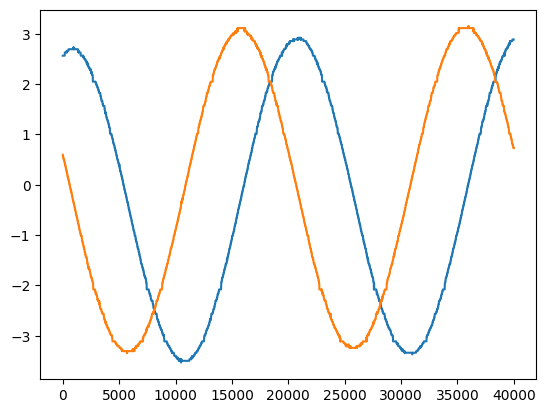

In [63]:
psl.waveform_generator.generate(channels=2, frequency=50, phase=90)
x, y, z = psl.oscilloscope.capture(channels=2, samples=5000, timegap=8)
plt.plot(x, y, x, z)

The waveform generator can also output other functions. `pslab-python` has two functions built-in: "sine" and "tria". These can be passed to the `WaveformGenerator.load_function` method.

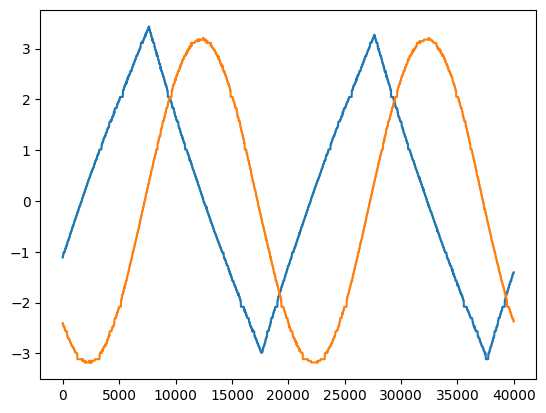

In [64]:
psl.waveform_generator.load_function(channel="SI1", function="tria")
x, y, z = psl.oscilloscope.capture(channels=2, samples=5000, timegap=8)
plt.plot(x, y, x, z)

Here we see that the two channels can independantly output different functions. Note also that when the function is changed, the output continues as before, with the same frequency and phase, without needing to be restarted.

It is also possible to supply custom functions by passing a callable in the `function` parameter. The callable should take a single argument, the function's x-value.

When generating custom functions, it is necessary to specify the x-span over which the function is periodic. For example, sine is periodic over \[0, 2π].

The function's return values over the x-span should be in the range \[-3.3, 3.3]. If the return values fit within a smaller range like this, the actual output from the PSLab will have the same amplitude, but centered on zero.

Let's super-impose two sine waves with different frequencies:

Analog output SI2 saturated.


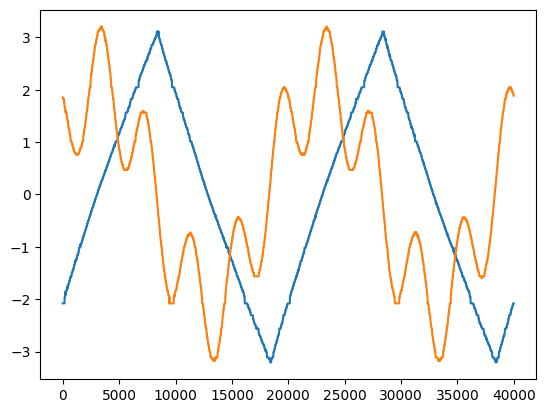

In [68]:
import numpy as np
def supersines(freq1, freq2):
    return lambda x: 2.2 * np.sin(freq1 *x) + 1.1 * np.sin(freq2 * x)
psl.waveform_generator.load_function(channel="SI2", function=supersines(1, 5), span=[0, 2 * np.pi])
x, y, z = psl.oscilloscope.capture(channels=2, samples=5000, timegap=8)
plt.plot(x, y, x, z)

Saw-tooth wave:

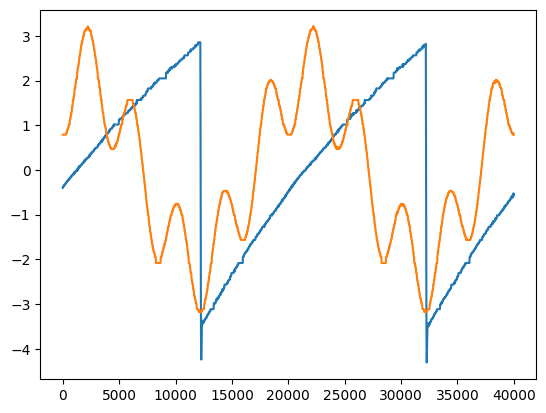

In [69]:
def sawtooth(x):
    return -6.6 * (x % 1) + 3.3
psl.waveform_generator.load_function(channel="SI1", function=sawtooth, span=[0, 1])
x, y, z = psl.oscilloscope.capture(channels=2, samples=5000, timegap=8)
plt.plot(x, y, x, z)